In [8]:
# Import Splinter, BeautifulSoup, Pandas, numpy and webdirver

from splinter import Browser
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from webdriver_manager.chrome import ChromeDriverManager
import requests

# Output File (CSV)
output_data_file = "mars_df.csv"


In [9]:
# Set the executable path and initialize Splinter

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - ====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
[WDM] - Current google-chrome version is 107.0.5304
INFO:WDM:Current google-chrome version is 107.0.5304
[WDM] - Get LATEST chromedriver version for 107.0.5304 google-chrome
INFO:WDM:Get LATEST chromedriver version for 107.0.5304 google-chrome
[WDM] - Driver [C:\Users\alist\.wdm\drivers\chromedriver\win32\107.0.5304.62\chromedriver.exe] found in cache
INFO:WDM:Driver [C:\Users\alist\.wdm\drivers\chromedriver\win32\107.0.5304.62\chromedriver.exe] found in cache


In [10]:
# Visit the mars challenge website

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


In [11]:
# Retrieve page from browser
html = browser.html

# Create BeautifulSoup object; parse with html parser ('lxml')    
soup = bs(html, 'html.parser')

# Retrieve the parent divs for all articles
#headlines = soup.find_all('div', class_='list_text')
soup


<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [12]:
# Close the browser 
browser.quit()


In [13]:
#Find header from website.

header = soup.find_all('th')
print(header[2].text)
len(header)

sol


7

In [14]:
#Create a dataframe to store collected data

mars_temp_df = pd.DataFrame(columns=[header[0].text, header[1].text, header[2].text, header[3].text, header[4].text, header[5].text, header[6].text])
mars_temp_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [15]:
#Scrape data from tables

rows = soup.find_all('tr', class_='data-row')

#collate information
for row in rows:
    cells = row.find_all('td')
    mars_temp_df = mars_temp_df.append({header[0].text: cells[0].text, header[1].text: cells[1].text, header[2].text: cells[2].text, header[3].text: cells[3].text, header[4].text: cells[4].text, header[5].text: cells[5].text, header[6].text: cells[6].text}, ignore_index=True)
mars_temp_df = mars_temp_df.set_index('id')

#Display results
mars_temp_df.head(10)

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
57,2012-08-21,15,158,6,-78.0,740.0
68,2012-08-22,16,158,6,-77.0,740.0
79,2012-08-23,17,159,6,-76.0,742.0
112,2012-08-27,21,161,6,-74.0,741.0


In [16]:
#Find the data types of the columns
mars_temp_df.dtypes


terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [17]:
#Convert data types

mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol'] = mars_temp_df['sol'].astype(int)
mars_temp_df['ls'] = mars_temp_df['ls'].astype(float)
mars_temp_df['month'] = mars_temp_df['month'].astype(int)
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype(float)

In [18]:
mars_temp_df.head(10)

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155.0,6,-75.0,739.0
13,2012-08-17,11,156.0,6,-76.0,740.0
24,2012-08-18,12,156.0,6,-76.0,741.0
35,2012-08-19,13,157.0,6,-74.0,732.0
46,2012-08-20,14,157.0,6,-74.0,740.0
57,2012-08-21,15,158.0,6,-78.0,740.0
68,2012-08-22,16,158.0,6,-77.0,740.0
79,2012-08-23,17,159.0,6,-76.0,742.0
112,2012-08-27,21,161.0,6,-74.0,741.0


In [19]:
#How many months exist on Mars?
print(f"There are {mars_temp_df['month'].nunique()} months on Mars")

#How many Martian (and not Earth) days' worth of data exist in the scraped dataset?
print(f"There are {mars_temp_df['sol'].nunique()} Martian days' worth of data in the scraped dataset")


There are 12 months on Mars
There are 1867 Martian days' worth of data in the scraped dataset


The coldest month on Mars is 3 with an average minimum temperature of -83.31 degrees Farenheit
The warmest month on Mars is 8 with an average minimum temperature of -68.38 degrees Farenheit


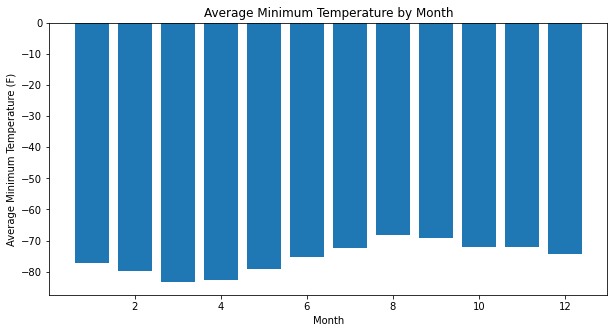

In [20]:
import matplotlib.pyplot as plt

#Group the dataframe by month and calculate the average minimum temperature
average_min_temp = mars_temp_df.groupby('month')['min_temp'].mean().round(2)

# What are the coldest (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
print(f"The coldest month on Mars is {average_min_temp.idxmin()} with an average minimum temperature of {average_min_temp.min()} degrees Farenheit")

# What are the warmest (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
print(f"The warmest month on Mars is {average_min_temp.idxmax()} with an average minimum temperature of {average_min_temp.max()} degrees Farenheit")

#Plot the results as a bar chart
plt.figure(figsize=(10,5))
plt.bar(average_min_temp.index, average_min_temp.values)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (F)')
plt.savefig('images/average_min_temp_by_month.png')
plt.show()

The month with the lowest atmospheric pressure on Mars is 6 with an average pressure of 745.05 Pa
The month with the highest atmospheric pressure on Mars is 9 with an average pressure of 913.31 Pa


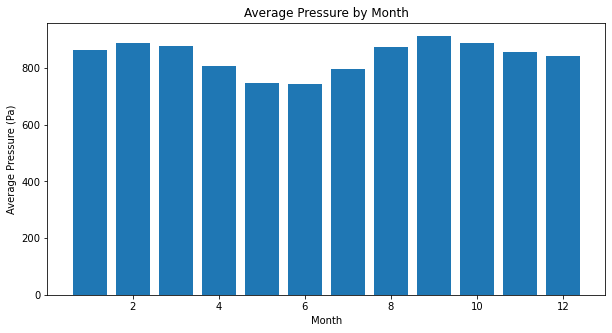

In [21]:
#Which months have the lowest and the highest atmospheric pressure on Mars?

avg_pressure = mars_temp_df.groupby('month')['pressure'].mean().round(2)
avg_pressure

# Which months have the lowest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
print(f"The month with the lowest atmospheric pressure on Mars is {avg_pressure.idxmin()} with an average pressure of {avg_pressure.min()} Pa")

# Which months have the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
print(f"The month with the highest atmospheric pressure on Mars is {avg_pressure.idxmax()} with an average pressure of {avg_pressure.max()} Pa")


#Plot the results as a bar chart

plt.figure(figsize=(10,5))
plt.bar(avg_pressure.index, avg_pressure.values)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.savefig('images/average_pressure_by_month.png')
plt.show()


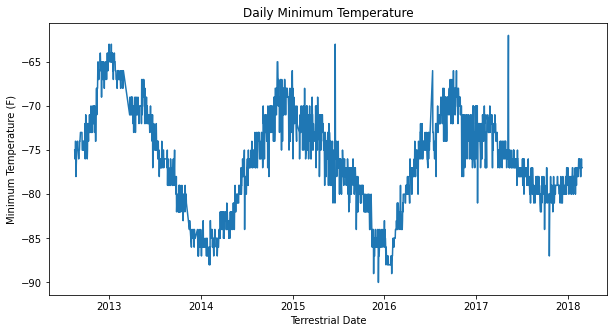

In [22]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

#Plot the daily minimum temperature

plt.figure(figsize=(10,5))
plt.plot(mars_temp_df['terrestrial_date'], mars_temp_df['min_temp'])
plt.title('Daily Minimum Temperature')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (F)')
plt.savefig('images/daily_min_temp.png')
plt.show()


In [23]:
#Store the dataframe in a csv file
mars_temp_df.to_csv('data/mars_temp_data.csv')